In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import quantile_transform, RobustScaler, Normalizer, RobustScaler,MinMaxScaler

In [2]:
path_raw_data = "./../ressources/raw_data_comple.csv"
path_to_preprocessed_data = "./../ressources/data_preprocessed.csv"

In [3]:
df = pd.read_csv(path_raw_data, index_col=False)

__Remove duplicates tweets (not excluding Rt)__

In [4]:
df.drop_duplicates(subset=["texte"], inplace=True)
df.texte.value_counts()

NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONSIEUR ZEMMOUR POUR CETTE INTERVENTION. JE SUIS OBLIGÉ DE SALUER CE DIS… https://t.co/GcDeDSS9mH    1
RT @Zacreepy_Memes: Pourquoi vive la France? 🇫🇷\nComment dire…\n\n#pixelwar https://t.co/5zrDsrgckP                                             1
L’intégration de Dogecoin pourrait enfin arriver à des millions d’utilisateurs après qu’Elon Musk ait acheté une én… https://t.co/Pvyj96kUum    1
CLASSEMENT EXCLUSIF MILLIARDAIRES 2022 : #ElonMusk (@elonmusk) devient l'homme le plus riche du monde devant Jeff B… https://t.co/NfhJhVYXBe    1
Elon Musk a acquis une participation de 9,2% dans Twitter                                                                                       1
                                                                                                                                               ..
RT @CerfiaFR: 🇺🇸💶 FLASH | Elon #Musk a acheté 9% du capital de #Twitter. Wall Street s'enflamme depuis son ouverture. \n\n(B

In [5]:
df.to_csv(path_raw_data, index=False)

__Info__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2897
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          2837 non-null   int64 
 1   texte            2837 non-null   object
 2   created_at       2837 non-null   object
 3   followers_count  2837 non-null   int64 
 4   is_verified      2837 non-null   int64 
 5   location         1618 non-null   object
 6   lang             2837 non-null   object
 7   fav              2837 non-null   int64 
 8   retweet          2837 non-null   int64 
 9   trend            2837 non-null   object
 10  trend_volume     2837 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 266.0+ KB


In [7]:
df.head()

,user_id,texte,created_at,followers_count,is_verified,location,lang,fav,retweet,trend,trend_volume
0,179530581,NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONS...,2022-04-02 02:37:39,5689800,1,NaN,fr,26457,7409,Booba,54842
1,33887820,"""Bravo Monsieur Zemmour"" : le rappeur Booba pr...",2022-04-02 15:16:07,166955,1,"Languedoc-Roussillon, France",fr,4249,1611,Booba,54842
2,27412519,Le rappeur Booba soutient publiquement Eric Ze...,2022-04-02 17:34:11,438536,1,Nouvelle-Aquitaine,fr,3560,1090,Booba,54842
3,1205851115948036096,RT @Lomav140: Booba c le seul rappeur grand pu...,2022-04-03 13:50:26,19676,0,Dans son cœur,fr,0,1985,Booba,54842
4,1438998366910832644,RT @Valeurs: 🔴 LGBT : Le rappeur Booba salue l...,2022-04-03 13:50:24,44,0,Bretagne Z.,fr,0,1305,Booba,54842


In [8]:
df.shape

(2837, 11)

In [9]:
df.texte.value_counts()

NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONSIEUR ZEMMOUR POUR CETTE INTERVENTION. JE SUIS OBLIGÉ DE SALUER CE DIS… https://t.co/GcDeDSS9mH    1
RT @Zacreepy_Memes: Pourquoi vive la France? 🇫🇷\nComment dire…\n\n#pixelwar https://t.co/5zrDsrgckP                                             1
L’intégration de Dogecoin pourrait enfin arriver à des millions d’utilisateurs après qu’Elon Musk ait acheté une én… https://t.co/Pvyj96kUum    1
CLASSEMENT EXCLUSIF MILLIARDAIRES 2022 : #ElonMusk (@elonmusk) devient l'homme le plus riche du monde devant Jeff B… https://t.co/NfhJhVYXBe    1
Elon Musk a acquis une participation de 9,2% dans Twitter                                                                                       1
                                                                                                                                               ..
RT @CerfiaFR: 🇺🇸💶 FLASH | Elon #Musk a acheté 9% du capital de #Twitter. Wall Street s'enflamme depuis son ouverture. \n\n(B

__Missing values__

In [10]:
df.isna().sum()

user_id               0
texte                 0
created_at            0
followers_count       0
is_verified           0
location           1219
lang                  0
fav                   0
retweet               0
trend                 0
trend_volume          0
dtype: int64

__Shape dataframe__

In [11]:
df.shape

(2837, 11)

__Preprocessing__

In [12]:
df_preprocessed = pd.read_csv(path_to_preprocessed_data)

In [13]:
df_preprocessed

,user_id,texte,created_at,followers_count,is_verified,location,lang,fav,retweet,trend,trend_volume,tweet_hour,tweet_day_of_the_week,tweet_quarter
0,179530581,NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONS...,2022-04-02 02:37:39,5689800,1,NaN,fr,2,2,Booba,54842,2,5,2
1,33887820,"""Bravo Monsieur Zemmour"" : le rappeur Booba pr...",2022-04-02 15:16:07,166955,1,"Languedoc-Roussillon, France",fr,2,2,Booba,54842,15,5,2
2,27412519,Le rappeur Booba soutient publiquement Eric Ze...,2022-04-02 17:34:11,438536,1,Nouvelle-Aquitaine,fr,2,2,Booba,54842,17,5,2
3,1205851115948036096,RT @Lomav140: Booba c le seul rappeur grand pu...,2022-04-03 13:50:26,19676,0,Dans son cœur,fr,0,2,Booba,54842,13,6,2
4,1438998366910832644,RT @Valeurs: 🔴 LGBT : Le rappeur Booba salue l...,2022-04-03 13:50:24,44,0,Bretagne Z.,fr,0,2,Booba,54842,13,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,1209909136865013761,RT @OliviaHyefrance: [ INFO ] #이달의소녀 #올리비아혜 #O...,2022-04-07 16:51:18,81,0,"Orléans, FRANCE",fr,0,0,Loona,219401,16,3,2
2833,1488959276282519563,[070422] INFO 💬\n\n➳ LOONA sont #3 en tendance...,2022-04-07 16:51:18,362,0,NaN,fr,0,0,Loona,219401,16,3,2
2834,2872569520,C'est super de voter Mélenchon mais le plus im...,2022-04-07 16:48:18,458,0,b|ɿowɘʜƚɒᴎoo|,fr,0,0,Loona,219401,16,3,2
2835,1406003385883578371,tt le monde dans le preview du round 2 qui dit...,2022-04-07 16:46:08,134,0,࣪ ˖ 𓂃 이채령 owns my heart =) !! loonatheworld ...,fr,0,0,Loona,219401,16,3,2


__Correlations__

<AxesSubplot:>

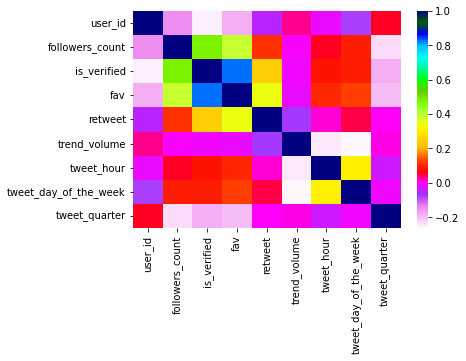

In [14]:
import seaborn as sns

corr_ = df_preprocessed.corr()
sns.heatmap(corr_,
           cmap="gist_ncar_r")

* __Target correlations__

   Correlations with follower_counts and is_verified feature
        

* __Features correlations__

__Target__

In [15]:
fav = df_preprocessed.fav.values
retweet = df_preprocessed.retweet.values

<AxesSubplot:>

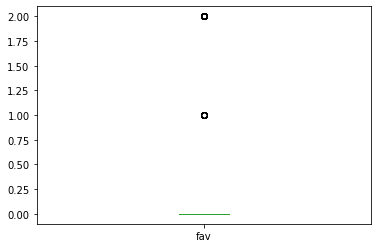

In [16]:
df_preprocessed.fav.plot(kind='box')

* There is outliers in the distribution

__Log Transformation__

In [17]:
df_preprocessed["log_fav"] = df_preprocessed.fav.apply(lambda x: np.log(x) if x > 0 else 0)

<AxesSubplot:ylabel='Frequency'>

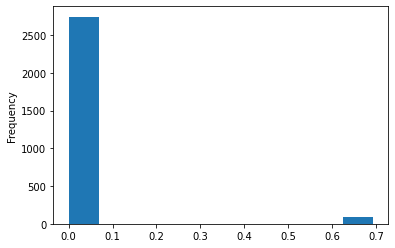

In [18]:
df_preprocessed.log_fav.plot(kind="hist")

<AxesSubplot:>

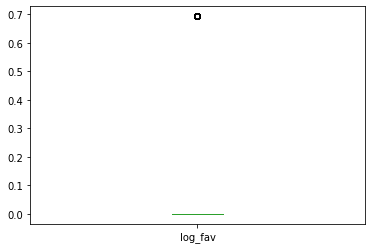

In [19]:
df_preprocessed.log_fav.plot(kind="box")

__quantile transformations__

In [20]:
fav_quantile_trans = quantile_transform(
    df_preprocessed.fav.to_frame(), n_quantiles=1000, output_distribution="normal", copy=True
).squeeze()

(array([2710.,    0.,    0.,    0.,    0.,    0.,   35.,    0.,    0.,
          92.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

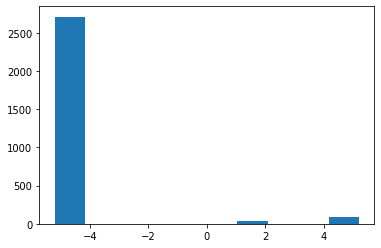

In [21]:
plt.hist(fav_quantile_trans)

__Normalizer__

In [22]:
q = df["fav"].quantile(0.99)

q


4789.599999999991

In [23]:
q = df["fav"].quantile(0.992)
df_preprocessed[df_preprocessed["fav"] < q].describe()

,user_id,followers_count,is_verified,fav,retweet,trend_volume,tweet_hour,tweet_day_of_the_week,tweet_quarter,log_fav
count,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2837.000000,2837.000000,2837.000000
mean,8.050637e+17,6.114678e+04,0.060627,0.077194,0.314417,3.626485e+05,13.244977,1.719069,1.997885,0.022478
std,6.098219e+17,4.858082e+05,0.238688,0.368972,0.638874,6.653615e+05,3.834681,2.036783,0.045948,0.122803
min,2.438161e+06,0.000000e+00,0.000000,0.000000,0.000000,1.170700e+04,0.000000,0.000000,1.000000,0.000000
25%,2.345819e+09,9.200000e+01,0.000000,0.000000,0.000000,6.365400e+04,10.000000,0.000000,2.000000,0.000000
50%,1.042901e+18,3.690000e+02,0.000000,0.000000,0.000000,1.442380e+05,13.000000,1.000000,2.000000,0.000000
75%,1.351740e+18,1.335000e+03,0.000000,0.000000,0.000000,3.071230e+05,16.000000,2.000000,2.000000,0.000000
max,1.512079e+18,9.937302e+06,1.000000,2.000000,2.000000,3.208177e+06,23.000000,6.000000,2.000000,0.693147


In [24]:
df_preprocessed[df_preprocessed["fav"] < q].describe()

,user_id,followers_count,is_verified,fav,retweet,trend_volume,tweet_hour,tweet_day_of_the_week,tweet_quarter,log_fav
count,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2837.000000,2837.000000,2837.000000
mean,8.050637e+17,6.114678e+04,0.060627,0.077194,0.314417,3.626485e+05,13.244977,1.719069,1.997885,0.022478
std,6.098219e+17,4.858082e+05,0.238688,0.368972,0.638874,6.653615e+05,3.834681,2.036783,0.045948,0.122803
min,2.438161e+06,0.000000e+00,0.000000,0.000000,0.000000,1.170700e+04,0.000000,0.000000,1.000000,0.000000
25%,2.345819e+09,9.200000e+01,0.000000,0.000000,0.000000,6.365400e+04,10.000000,0.000000,2.000000,0.000000
50%,1.042901e+18,3.690000e+02,0.000000,0.000000,0.000000,1.442380e+05,13.000000,1.000000,2.000000,0.000000
75%,1.351740e+18,1.335000e+03,0.000000,0.000000,0.000000,3.071230e+05,16.000000,2.000000,2.000000,0.000000
max,1.512079e+18,9.937302e+06,1.000000,2.000000,2.000000,3.208177e+06,23.000000,6.000000,2.000000,0.693147


In [25]:
scale_fav  = Normalizer(norm="l2").fit_transform(df_preprocessed[df_preprocessed["fav"] < q].fav.to_frame())

(array([2710.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  127.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

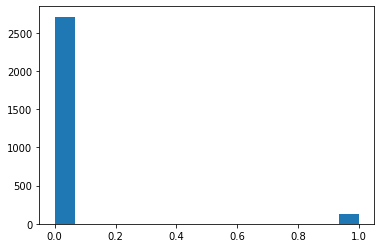

In [26]:
plt.hist(scale_fav, bins=15)

* Exactly what we want, 2 big buckets 
* The first's one group tweet with low fav and the second's one group with big values

In [27]:
df_preprocessed[["fav","retweet"]]

,fav,retweet
0,2,2
1,2,2
2,2,2
3,0,2
4,0,2
...,...,...
2832,0,0
2833,0,0
2834,0,0
2835,0,0


Standard Scaler

In [28]:
scale_fav  = RobustScaler().fit_transform(df_preprocessed[df_preprocessed["fav"] < q].fav.to_frame())


(array([2710.,    0.,    0.,    0.,    0.,   35.,    0.,    0.,    0.,
          92.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

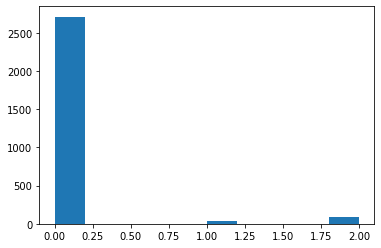

In [29]:
plt.hist(scale_fav, bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8a641bfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8a642b580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8a641bcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8a642bb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8a642bdf0>],
 'means': []}

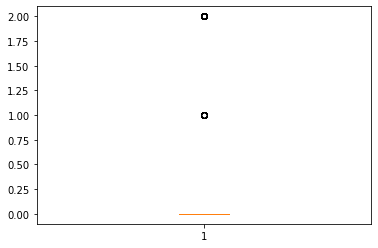

In [30]:
plt.boxplot(scale_fav)

__Regression is unpredictable__